In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### distance matrix

In [2]:
## distance matrix function
from math import sqrt
def distance_matrix(center):
    distances=[]
    
    for j in center:
        distance=[]
        for i in center:
            x1=i[0]-j[0]
            y1=i[1]-j[1]
            dist=sqrt((x1*x1)-(y1*y1))
            distance.append(dist)
        
        distances.append(distance)
    return distances

In [3]:
weights='pretrained models/yolov3tiny/yolov3-tiny.weights'
cfg='pretrained models/yolov3tiny/yolov3--tiny.cfg.txt'
lab='pretrained models/yolov3tiny/coco.names.txt'

In [4]:
LABELS = open(lab).read().strip().split("\n")

In [5]:
net=cv2.dnn.readNetFromDarknet(cfg,weights)

In [6]:
image=cv2.imread('pedestrian.png')
H,W=image.shape[:2]
ln=net.getLayerNames()
lns=[ln[i[0]-1] for i in net.getUnconnectedOutLayers()]
blob=cv2.dnn.blobFromImage(image,1/255.0,(416,416),swapRB=True,crop=False)
net.setInput(blob)
layeroutputs=net.forward(lns)

In [7]:
centers=[]
boxes=[]
confidences=[]
classes=[]

In [8]:
for layer in layeroutputs:
    for detection in layer:
        scores=detection[5:]
        classID=np.argmax(scores)
        if classID==0:
            confidence=scores[classID]
            if confidence > .35:
                box=detection[:4]*np.array([W,H,W,H])
                (centerX,centerY,width,height)=box.astype('int')
                x=int(centerX-(width/2))
                y=int(centerY-(height/2))
                
                centers.append([centerX,centerY])
                boxes.append([x,y,int(width),int(height)])
                classes.append(classID)
                confidences.append(float(confidence))

In [9]:
distances=np.array(distance_matrix(centers))

In [10]:
scd=[]
for i in range(distances.shape[0]):
    for j in range(distances.shape[1]):
        if i<j:
            if distances[i,j]<100:
                scd.append(i)
                scd.append(j)
                
                

In [11]:
scd

[0, 4, 1, 5]

In [12]:
idxs=cv2.dnn.NMSBoxes(boxes , confidences , .35, .3)

In [13]:
for i in centers:
    cv2.circle(image,(i[0],i[1]),10,(0,0,255),2)

In [14]:
if len(idxs)>0:
    for j in idxs.flatten():
        (x, y)= (boxes[j][0] , boxes[j][1])
        (w, h)= (boxes[j][2] , boxes[j][3])
        
        if j not in scd:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),5)
            text='{} : safe'.format(LABELS[classes[j]])
            cv2.putText(image,text,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,.7,(0,255,0),2)
        else:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),5)
            text='{} : not safe'.format(LABELS[classes[j]])
            cv2.putText(image,text,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,.7,(0,0,255),2)

    

In [15]:
cv2.imshow('live detection prediction',image)
if cv2.waitKey(0)==13:
    cv2.destroyAllWindows()


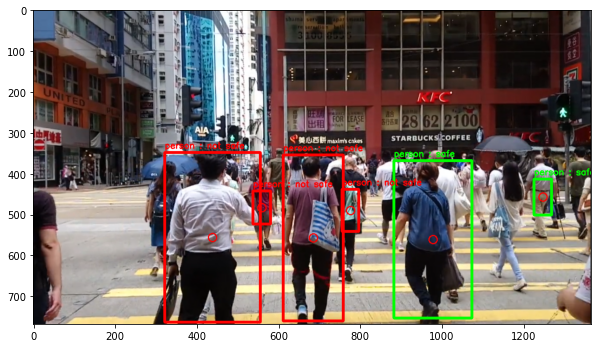

In [16]:
im=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(im)

# YOLO live detection of Social Distancing

In [18]:
import numpy as np
import cv2
import winsound

In [100]:
# def sound(scd):
#     if len(scd)>0:
#         winsound.Beep(4000,30)

In [95]:
## distance matrix function
from math import sqrt
def distance_matrix(center):
    distances=[]
    
    for j in center:
        distance=[]
        for i in center:
            x1=i[0]-j[0]
            y1=i[1]-j[1]
            dist=sqrt(abs((x1*x1)-(y1*y1)))
            
            distance.append(dist)
        
        distances.append(distance)
    return distances

In [96]:
weights='pretrained models/yolov3tiny/yolov3-tiny.weights'
cfg='pretrained models/yolov3tiny/yolov3--tiny.cfg.txt'
lab='pretrained models/yolov3tiny/coco.names.txt'

LABELS = open(lab).read().strip().split("\n")

In [97]:
net=cv2.dnn.readNetFromDarknet(cfg,weights)

In [103]:
import cv2 
from math import sqrt
inp=int(input('Enter the minimum Social Distance :'))
def detects(image):
    
    H,W=image.shape[:2]
    ln = net.getLayerNames()
    lns = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)
    net.setInput(blob)
    
    layerOutputs = net.forward(lns)
    
    boxes = []
    confidences = []
    classes = []
    centers=[]
    
   
    # loop over each of the layer outputs
    for output in layerOutputs:
        # loop over each of the detections
        for detection in output:
            # extract the class ID and confidence (i.e., probability) of
            # the current object detection
            scores = detection[5:]
            classID = np.argmax(scores)
            if classID==0:
                confidence = scores[classID]
                # filter out weak predictions by ensuring the detected
                # probability is greater than the minimum probability
                if confidence > .4:
                    # scale the bounding box coordinates back relative to the
                    # size of the image, keeping in mind that YOLO actually
                    # returns the center (x, y)-coordinates of the bounding
                    # box followed by the boxes' width and height
                    box = detection[0:4] * np.array([W, H, W, H])
                    (centerX, centerY, width, height) = box.astype("int")
                    # use the center (x, y)-coordinates to derive the top and
                    # and left corner of the bounding box
                    x = int(centerX - (width / 2))
                    y = int(centerY - (height / 2))
                    # update our list of bounding box coordinates, confidences,
                    # and class IDs
                    centers.append([centerX,centerY])
                    boxes.append([x, y, int(width), int(height)])
                    confidences.append(float(confidence))
                    classes.append(classID)
                    
                   
    distances=np.array(distance_matrix(centers))
    scd=[]
    for i in range(distances.shape[0]):
        for j in range(distances.shape[1]):
            if i<j:
                if distances[i,j]<inp:
                    scd.append(i)
                    scd.append(j)
    
    
    people_not_follow_social_distancing=len(scd)


    
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, .3,.2)
    for j in centers:
        cv2.circle(image,(j[0],j[1]),2,(0,255,255),1)
        
        
    if len(idxs)>0:
        for j in idxs.flatten():
            (x, y)= (boxes[j][0] , boxes[j][1])
            (w, h)= (boxes[j][2] , boxes[j][3])
            
            text='social_distancing_violating : {}'.format(people_not_follow_social_distancing)
            cv2.putText(image,text,(0,H-10),cv2.FONT_HERSHEY_SIMPLEX,.7,(0,0,255),3)
            #sound(scd)
            if j not in scd:
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),1)
                text='{} : safe'.format(LABELS[classes[j]])
                #cv2.putText(image,text,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,.7,(0,255,0),2)
            else:
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),1)
                text='{} : not safe'.format(LABELS[classes[j]])
                #cv2.putText(image,text,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,.7,(0,0,255),2)


    
    
    return image


c=cv2.VideoCapture('pedestrain3.mp4')
while True:
    ret,image=c.read()
    cv2.imshow('live detection prediction',detects(image))
    if cv2.waitKey(1)==13:
        break
c.release()
cv2.destroyAllWindows()

Enter the minimum Social Distance :100


In [104]:
cv2.destroyAllWindows()